<a href="https://colab.research.google.com/github/lauraemmanuella/DataScience/blob/main/3_AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acesso ao Drive

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/DataScience

/content/drive/MyDrive/Colab Notebooks/DataScience


# Bibliotecas

In [ ]:
#Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Carrega dataset

In [69]:
#cria dataframe com dados coletados no site SKOOB
dfSkoob = pd.read_csv('https://raw.githubusercontent.com/lauraemmanuella/DataScience/main/dados.csv')

# Análise Exploratória do Dataset

https://pandas.pydata.org/docs/reference/frame.html

In [ ]:
# mostra quantidade de amostras
# mostra quantidade de colunas
# mostra os nomes das colunas
print('*************************************************************************')
print(f'Número de amostras: {dfSkoob.shape[0]}') 
print(f'Número de colunas: {dfSkoob.shape[1]}')
print(f'Nomes das colunas: {dfSkoob.columns.values}')
print('*************************************************************************')

*************************************************************************
Número de amostras: 11975
Número de colunas: 20
Nomes das colunas: ['titulo' 'autor' 'ISBN_13' 'ISBN_10' 'ano' 'paginas' 'idioma' 'editora'
 'rating' 'avaliacao' 'resenha' 'abandonos' 'relendo' 'querem_ler' 'lendo'
 'leram' 'descricao' 'genero' 'male' 'female']
*************************************************************************


In [ ]:
#mostra tipo de dados das colunas 
dfSkoob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11975 entries, 0 to 11974
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   titulo      11975 non-null  object 
 1   autor       11971 non-null  object 
 2   ISBN_13     11216 non-null  float64
 3   ISBN_10     11216 non-null  object 
 4   ano         11975 non-null  int64  
 5   paginas     11975 non-null  int64  
 6   idioma      11973 non-null  object 
 7   editora     11974 non-null  object 
 8   rating      11975 non-null  float64
 9   avaliacao   11975 non-null  int64  
 10  resenha     11975 non-null  int64  
 11  abandonos   11975 non-null  int64  
 12  relendo     11975 non-null  int64  
 13  querem_ler  11975 non-null  int64  
 14  lendo       11975 non-null  int64  
 15  leram       11975 non-null  int64  
 16  descricao   11318 non-null  object 
 17  genero      11386 non-null  object 
 18  male        11975 non-null  int64  
 19  female      11975 non-nul

In [ ]:
#alterar tipo da coluna, caso necessário (nesse caso não dá certo, pois tem valores com caracteres)
#pd.to_numeric(dfSkoob['ISBN_10'])

In [ ]:
#verifica quantas amostras possuem valor NaN por coluna
dfSkoob.isna().sum() 

titulo          0
autor           4
ISBN_13       759
ISBN_10       759
ano             0
paginas         0
idioma          2
editora         1
rating          0
avaliacao       0
resenha         0
abandonos       0
relendo         0
querem_ler      0
lendo           0
leram           0
descricao     657
genero        589
male            0
female          0
dtype: int64

**Métodos para aplicar sobre uma Série (coluna do DataFrame):** https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [ ]:
#mostra as amostras onde a coluna autor é NaN (isna() ou isnull())
dfSkoob[dfSkoob['autor'].isna()] #esse procedimento é chamado de Seleção Condicional, mostra as linhas do df onde os isna retornou TRUE

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
248,Uma Vida No Escuro,NaN,9.788581e+12,8580578833,2018,0,português,Intrínseca,0.0,0,0,0,0,0,0,0,NaN,NaN,0,0
602,Linhagem zero,NaN,9.788581e+12,8580579309,2016,83,português,Intrínseca,0.0,0,0,0,0,0,0,0,Uma nova saga tem início Em Linhagem Zero: Des...,,0,0
2212,BRINQUE COMIGO CORES,NaN,9.788575e+12,8575423703,2008,10,português,Sextante,2.0,1,0,0,0,0,0,2,As crianças vão adorar aprender com a coleção ...,,0,100
8071,O Escravo - da África para a senzala. Ed. Econ...,NaN,9.788542e+12,8542207815,2017,0,português,Editora,3.8,5,0,0,0,0,2,1,NaN,NaN,21,79


In [ ]:
dfSkoob['autor'].isna() #isna retorna true ou false

0        False
1        False
2        False
3        False
4        False
         ...  
11970    False
11971    False
11972    False
11973    False
11974    False
Name: autor, Length: 11975, dtype: bool

In [ ]:
dfSkoob[dfSkoob['autor'].isna()].titulo #se quiser ver apenas uma coluna

248                                    Uma Vida No Escuro
602                                         Linhagem zero
2212                                 BRINQUE COMIGO CORES
8071    O Escravo - da África para a senzala. Ed. Econ...
Name: titulo, dtype: object

In [ ]:
dfSkoob[dfSkoob['autor'].isna()][['titulo','editora']] #se quiser ver uma lista de colunas específicas

,titulo,editora
248,Uma Vida No Escuro,Intrínseca
602,Linhagem zero,Intrínseca
2212,BRINQUE COMIGO CORES,Sextante
8071,O Escravo - da África para a senzala. Ed. Econ...,Editora


In [ ]:
#mostra as 5 primeiras amostras
dfSkoob.head()

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


In [ ]:
#mostra as 5 ultimas amostras
dfSkoob.tail()

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
11970,Poemas completos de Alberto Caeiro,Fernando Pessoa,9.788572e+12,8572324704,2007,208,português,Martin,4.2,1,27,46,18,552,89,3,"Nos Poemas Completos de Alberto Caeiro (1946),...","Literatura Estrangeira / Poemas, poesias",33,67
11971,Poesia de Álvaro de Campos,Fernando Pessoa,9.798572e+12,857232707X,2007,600,português,Martin,4.6,99,2,4,3,50,2,222,"Cerebral e retraído, Fernando Pessoa concebeu ...",Ficção / Literatura Brasileira,47,53
11972,Ben-Hur,Lewis Wallace,9.788572e+12,8572326359,2006,528,português,Martin,4.0,731,28,30,2,980,99,1,"O romance épico ""Ben-Hur - Uma História dos Te...",Aventura / Cinema / Crime / Crônicas / Drama /...,44,56
11973,Folhas de Relva,Walt Whitman,9.788572e+12,8572324364,2005,575,português,Martin,4.4,471,18,34,4,1,130,855,Walt Whitman é considerado pela crítica mundia...,"Literatura Estrangeira / Poemas, poesias",41,59
11974,O sermão da montanha,Huberto Rohden,9.788572e+12,8572326227,2003,158,português,Martin,4.3,92,2,2,4,103,8,164,O Sermão da Montanha é uma das mais belas mens...,Religião e Espiritualidade,58,42


In [ ]:
#descrição estatística das colunas numéricas
dfSkoob.describe()

,ISBN_13,ano,paginas,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,male,female
count,1.121600e+04,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000
mean,9.786089e+12,2008.346054,276.473403,3.797946,114.259457,47.412443,35.499123,9.894196,142.614781,50.243925,121.137286,26.705971,72.091441
std,1.424009e+11,64.546049,175.271758,0.849009,200.385036,122.167544,114.309894,58.054885,228.824239,125.852173,203.102998,20.152748,21.470387
min,8.551005e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.788533e+12,2007.000000,168.000000,3.600000,5.000000,0.000000,0.000000,0.000000,3.000000,1.000000,5.000000,10.000000,60.000000
50%,9.788551e+12,2012.000000,256.000000,4.000000,22.000000,4.000000,2.000000,0.000000,29.000000,6.000000,27.000000,24.000000,76.000000
75%,9.788579e+12,2016.000000,348.000000,4.200000,114.000000,29.000000,13.000000,2.000000,170.000000,34.000000,129.000000,39.000000,89.000000
max,9.999097e+12,2021.000000,4606.000000,10.000000,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000,100.000000,100.000000


* DataFrame.count: número de observações não nulas

* DataFrame.mean: média dos valores

* DataFrame.std: desvio padrão

* DataFrame.max: valor máximo 

* DataFrame.min: valor mínimo

**Percentis**

25%, 50% e 75% mostram os percentis: Um percentil indica o valor tal que X% das amostras assumem até esse valor. 

Exemplo: Na coluna página do dfSkoob, 25% dos livros tem até 168 páginas, 50% tem até 256 páginas (mediana) e 75% dos livros tem até 348 páginas, sendo que o máximo de páginas é 4606

In [ ]:
#inclui apenas colunas categóricas na descrição
dfSkoob.describe(include='object') 

,titulo,autor,ISBN_10,idioma,editora,descricao,genero
count,11975,11971,11216,11973,11974,11318,11386
unique,10617,5067,10425,6,90,10967,3378
top,O Alquimista,Clarice Lispector,8574797766,português,Rocco,"A Fascinação pelo Pior, seu primeiro livro tra...",
freq,11,104,61,11831,3468,5,2802


* unique: quantidade de valores únicos
* top: é o valor mais comum
* freq: é a frequência do valor mais comum

In [ ]:
#mostra os valores únicos
dfSkoob['idioma'].unique()

array(['português', 'inglês', 'holandês', 'espanhol', 'francês',
       'italiano', nan], dtype=object)

In [ ]:
#conta quantas amostras em cada valor
dfSkoob['idioma'].value_counts()
#Observe que top na coluna idiona retornou portugues e freq 11831, exatamente o primeiro registro do value_counts

português    11831
inglês          96
espanhol        43
holandês         1
francês          1
italiano         1
Name: idioma, dtype: int64

## Análise Exploratória Visual

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting

Existem vários tipos de plots incorporados aos pandas, a maioria deles plots estatísticos por natureza:

* df.plot.area
* df.plot.barh
* df.plot.density
* df.plot.hist
* df.plot.line
* df.plot.scatter
* df.plot.bar
* df.plot.box
* df.plot.hexbin
* df.plot.kde
* df.plot.pie

Você também pode simplesmente chamar df.plot (kind = 'hist') ou substituir esse argumento por qualquer um dos termos-chave mostrados na lista acima (por exemplo, 'box', 'barh', etc.)

Podemos visualizar em gráfico os dados de uma coluna do dataframe, de uma seleção condicional do dataframe ou do dataframe completo

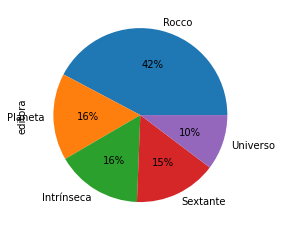

In [ ]:
dfSkoob['editora'].value_counts().head().plot.pie(autopct='%.0f%%')

**Usando Matplotlib**

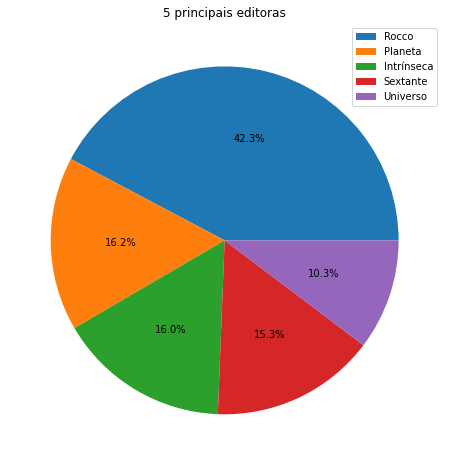

In [70]:
dados = dfSkoob['editora'].value_counts().head()
legenda = dados.index

fig, ax1 = plt.subplots(figsize = (8,8)) 
plt.pie(dados, autopct='%1.1f%%')
plt.title('5 principais editoras')
plt.legend(legenda,loc= 'upper right')
plt.show()

## Boxplot: Detecção de Outliers

https://lucasmbribeiro.medium.com/boxplot-1c8d2e0cb158


https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097


https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule


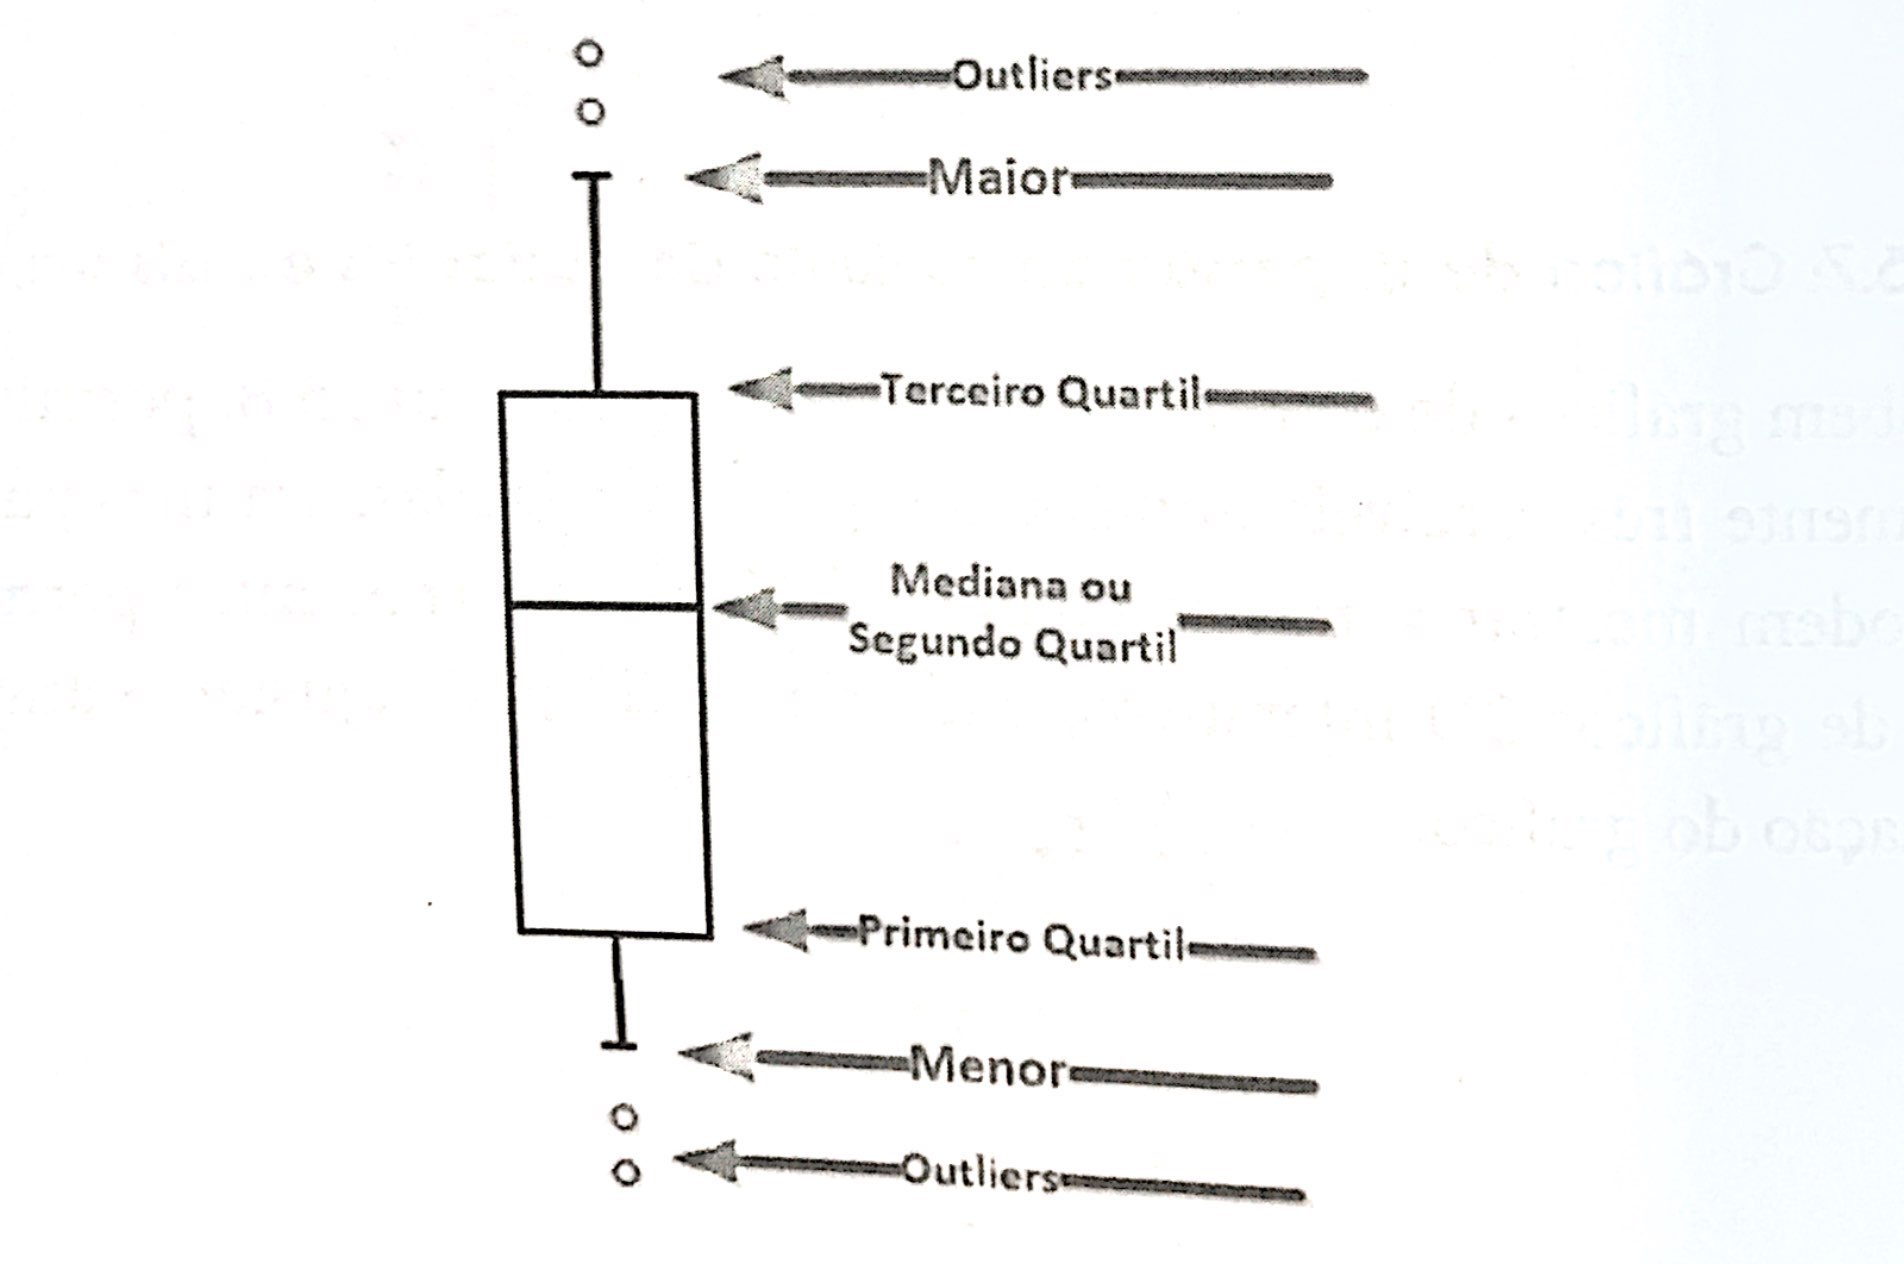

In [ ]:
from IPython.display import Image
Image('./boxplot.jpg', width = 600, height = 400)

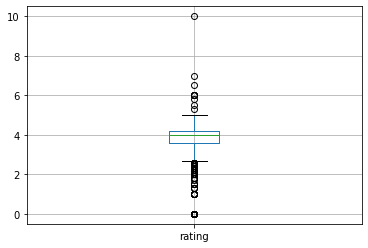

In [ ]:
 dfSkoob['rating'].plot.box(grid = True) #OU dfSkoob.boxplot('rating')

In [ ]:
dfSkoob['rating'].describe()

count    11975.000000
mean         3.797946
std          0.849009
min          0.000000
25%          3.600000
50%          4.000000
75%          4.200000
max         10.000000
Name: rating, dtype: float64

In [ ]:
#trata outlier pela regra do 1.5*IQR (variação interquartil)

q1 = dfSkoob['rating'].quantile(0.25)
print(f'q1: {q1}')
q3 = dfSkoob['rating'].quantile(0.75)
print(f'q3: {q3}')
iqr = q3 - q1
print(f'iqr: {iqr}')
lLim = q1 - 1.5 * iqr 
print(f'lLim: {lLim}')
hLim = q3 + 1.5 * iqr
print(f'hLim: {hLim}')

q1: 3.6
q3: 4.2
iqr: 0.6000000000000001
lLim: 2.7
hLim: 5.1000000000000005


In [ ]:
print(dfSkoob[dfSkoob['rating'] > hLim].shape[0]) #tem 11 amostras com outlier no rating (valores acima de 5)

11


In [ ]:
#SUBSTITUI VALORES CONSIDERADOS OUTLIER

#dfSkoob.loc[dfSkoob['rating'] < lLim, 'rating'] = lLim #substitui os valores abaixo do limite inferior pelo limite inferior
dfSkoob.loc[dfSkoob['rating'] > hLim, 'rating'] = hLim #substitui os valores acima do limite superior pelo limite superior

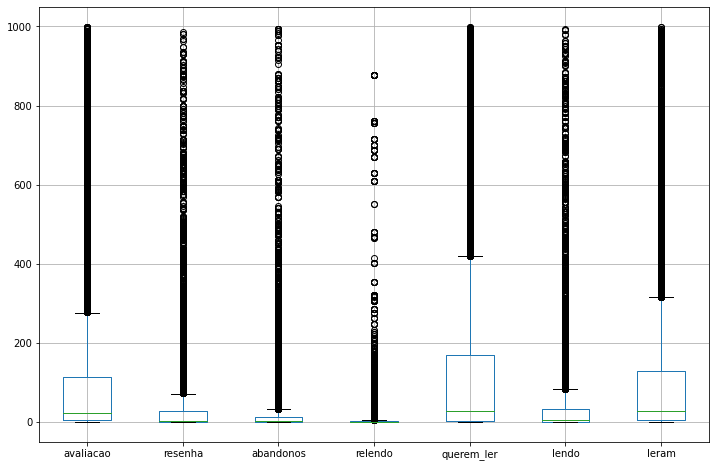

In [93]:
colunas = ['avaliacao', 'resenha', 'abandonos', 'relendo', 'querem_ler', 'lendo','leram']
dfSkoob[colunas].plot.box(grid = True, figsize=(12,8))

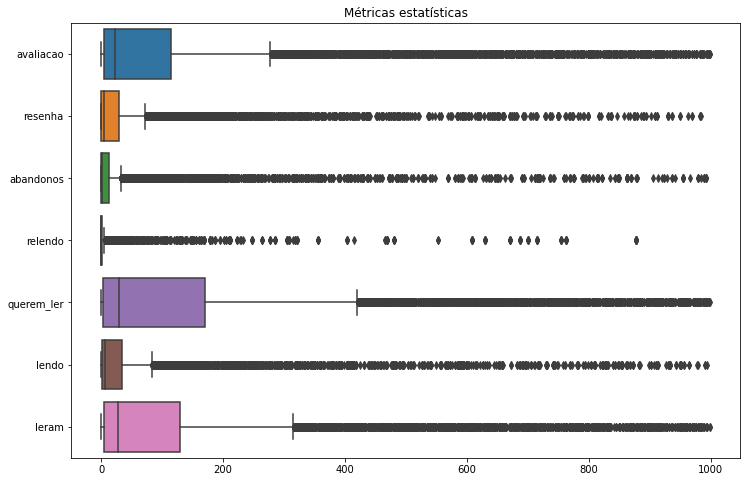

In [94]:
fig, ax1 = plt.subplots(figsize = (12,8)) 
ax1 = sb.boxplot(data = dfSkoob[colunas], orient= 'h') #use orient h para mudar a orientação padrão (vertical)
plt.title('Métricas estatísticas')
plt.show()

In [81]:
dfSkoob[colunas].describe()

,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram
count,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000
mean,114.259457,47.412443,35.499123,9.894196,142.614781,50.243925,121.137286
std,200.385036,122.167544,114.309894,58.054885,228.824239,125.852173,203.102998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,3.000000,1.000000,5.000000
50%,22.000000,4.000000,2.000000,0.000000,29.000000,6.000000,27.000000
75%,114.000000,29.000000,13.000000,2.000000,170.000000,34.000000,129.000000
max,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000


BoxPlot com Matplotlib e Seaborn: https://medium.com/20-21/boxplot-com-python-usando-matplotlib-e-seaborn-be42cea47a6c


## Histograma

Um histograma é um gráfico de **frequência** que serve para mostrar como os dados estão distribuídos.

Ele mede quantas vezes temos determinado valor (ou intervalo de valores) nessa distribuição de dados.

**Quando utilizar?**

O histograma permite observar onde estão concentrados a maioria dos dados em análise.

**Como construir?**

Um histograma é construído dividindo os dados em intervalos, preferencialmente de tamanhos iguais (bins)

Os dados são distribuídos em 10 intervalos, por padrão. Dessa forma, perceba no gráfico abaixo que ele dividiu em intervalos de 0.5 (os intervalos são melhor visualizados usando o argumento edgecolor que mostra as linhas entre os bins)

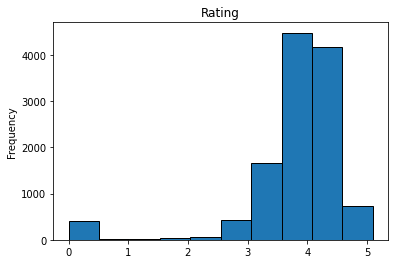

In [ ]:
dfSkoob['rating'].plot.hist(title='Rating', edgecolor='black')

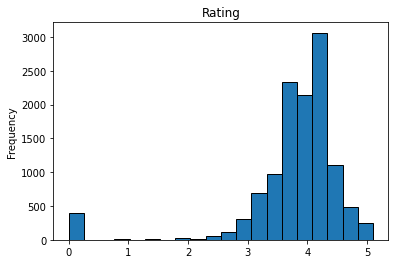

In [ ]:
dfSkoob['rating'].plot.hist(title='Rating', edgecolor='black', bins = 20) #aumentando a quantidade de intervalos (bins)

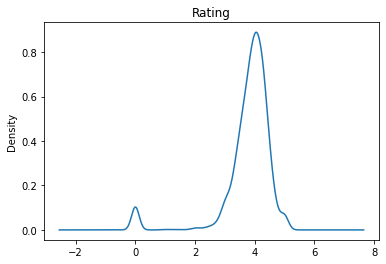

In [ ]:
dfSkoob['rating'].plot.kde(title='Rating')

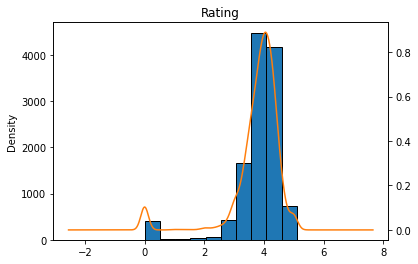

In [ ]:
ax = dfSkoob['rating'].plot.hist(title='Rating', edgecolor='black')
dfSkoob['rating'].plot.kde(ax=ax, secondary_y=True)

Saber se os dados são normalmente distribuídos é importante quando queremos aplicar uma técnica que considera que os dados são distribuídos normalmente em torno da média para fazer inferências

Outras distribuições comuns são:

* Assimétrica positiva: maior frequencia nos valores mais baixos
* Assimétrica negativa: maior frequência nos valores mais altos


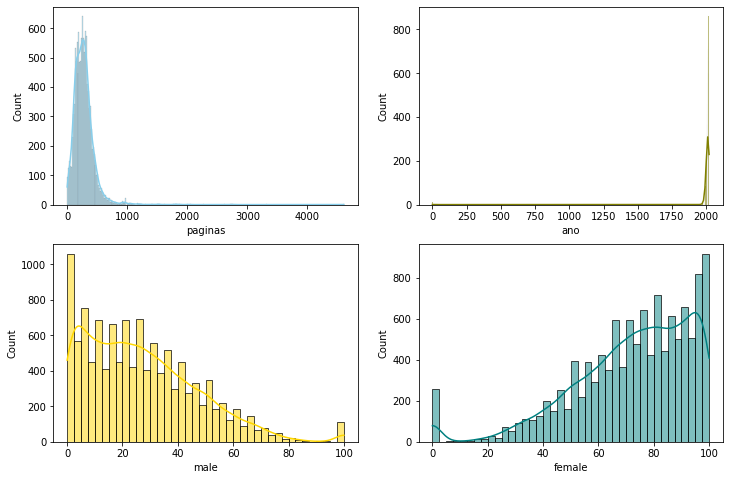

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sb.histplot(data=dfSkoob, x='paginas', kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(data=dfSkoob, x='ano', kde=True, color="olive", ax=axs[0, 1])
sb.histplot(data=dfSkoob, x='male', kde=True, color="gold", ax=axs[1, 0])
sb.histplot(data=dfSkoob, x='female', kde=True, color="teal", ax=axs[1, 1])

plt.show()

## Gráfico de dispersão

O Gráfico de dispersão permite relacionar variáveis numéricas, percebendo a relação entre elas para diferentes amostras



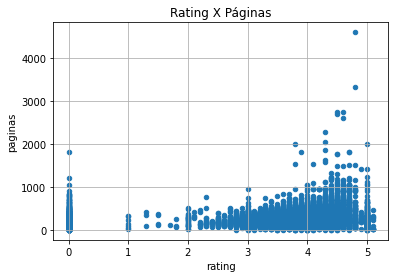

In [ ]:
dfSkoob.plot.scatter(x='rating',y='paginas', title = 'Rating X Páginas', grid = True)

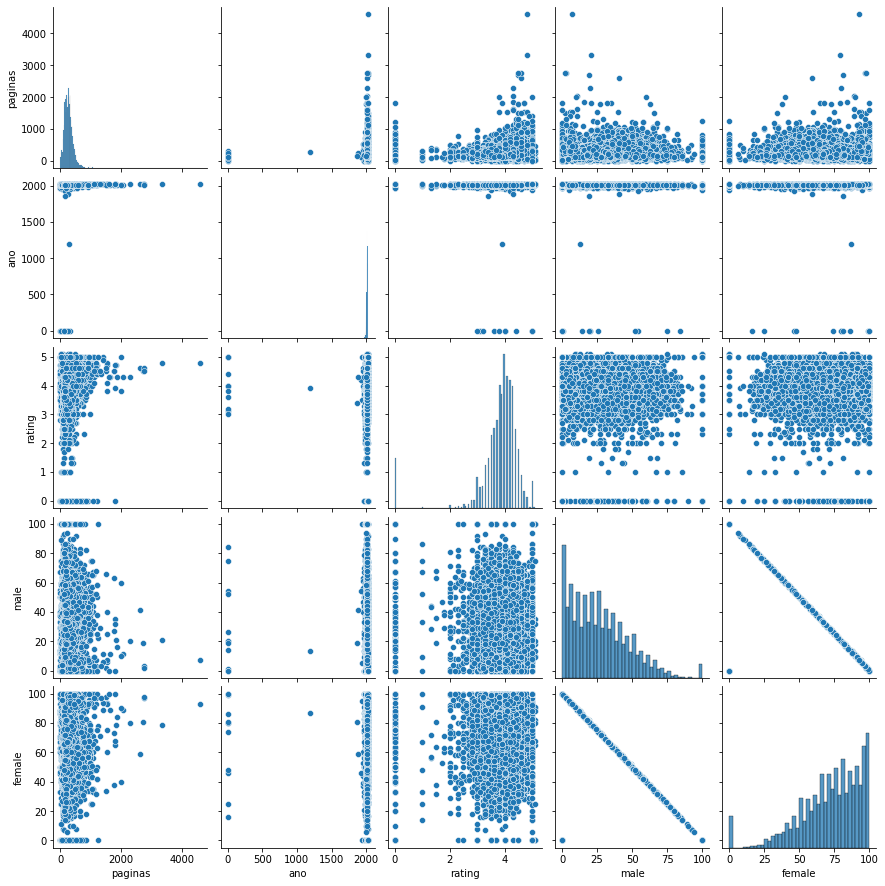

In [ ]:
sb.pairplot(data=dfSkoob[['paginas', 'ano', 'rating', 'male', 'female']])

## Correlação

Verifica o quão fortemente dois atributos estão correlacionados entre si. Uma medida de correlação clássica é o coeficiente de correlação de Pearson que mede o grau de correlação e a direção dessa correlação, se positiva ou negativa.

Esse coeficiente assume apenas valores entre -1 e 1, onde:
* 1 significa uma correlação perfeita positiva entre as duas variáveis;
* -1 significa uma correlação perfeita negativa entre as duas variáveis, ou seja, se uma aumenta a outra diminui;
* 0 significa que as duas variáveis não dependem linearmente uma da outra

Pode-se dizer ainda que, considerando os valores positivos ou negativos:
* 0 < corr < 0.3 significa fraca correlação;
* 0.3 < corr < 0.7 significa correlação moderada; 
* 0.7 < corr < 1 significa correlação forte.

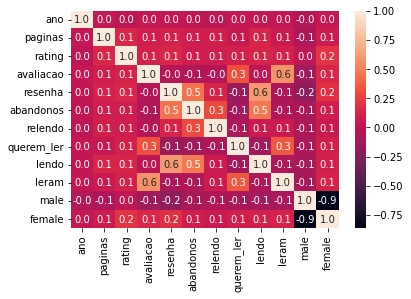

In [ ]:
corr = dfSkoob.select_dtypes(exclude='object').drop(columns = 'ISBN_13').corr()
sb.heatmap(corr, annot=True, fmt=".1f") 

## Nuvem de palavras

https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/

https://github.com/carlosfab/sigmoidal_ai/blob/master/Como_Criar_uma_WordCloud_em_Python.ipynb

In [ ]:
from wordcloud import WordCloud, STOPWORDS

**Analisando as colunas categóricas para gerar nuvens de palavras**

In [ ]:
#DataFrame.select_dtypes
#Subconjunto de um DataFrame incluindo / excluindo colunas com base em seu dtype.
colunascategoricas = dfSkoob.select_dtypes('object')

In [ ]:
colunascategoricas.head(2)

,titulo,autor,ISBN_10,idioma,editora,descricao,genero
0,Orçamento sem falhas,Nath Finanças,6555601566,português,Intrínseca,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N..."
1,Minha Sombria Vanessa,Kate Elizabeth Russell,8551006274,português,Intrínseca,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...


In [ ]:
colunascategoricas.isna().sum()

titulo         0
autor          4
ISBN_10      759
idioma         2
editora        1
descricao    657
genero       589
dtype: int64

**Passo a passo:**

1.   Transformar a coluna do DataFrame em uma única String, para isso podemos fazer os seguintes passos:
* Transforma a coluna em uma lista (remove os NaNs primeiro)
* Transforma a lista em uma String
2. Criar um objeto WordCloud e chamar o método generate com a String criada anteriormente
3. Plota a WordCloud em uma figura para configurar apresentação (tamanho etc)



**WordCloud dos autores**

In [ ]:
autores = dfSkoob['autor'].dropna().to_list()
#autores

In [ ]:
# concatenar as expressões de cada elemento da lista em uma String única
autores = ",".join(s for s in autores)

# vendo a quantidade de expressões diferentes
print(f'Quantidade de Expressões: {len(autores)}')

Quantidade de Expressões: 178548


In [ ]:
autores

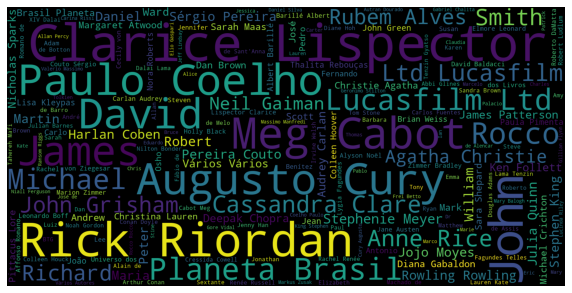

In [ ]:
# gerar uma wordcloud dos autores
wordcloudAutores = WordCloud(background_color="black", width=1600, height=800).generate(autores)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off() #não mostra os valores dos eixos x e Y
plt.imshow(wordcloudAutores); #mostra imagem
#wordcloud.to_file('./autores.png') #se quiser salvar

**WordCloud do gênero literário**

In [ ]:
#Transforma Serie em List
genero = dfSkoob['genero'].dropna().to_list()

In [ ]:
genero

In [ ]:
#Trata a lista para remover '/' e vírgulas, 
# remove também espaços em branco no começo e final da str e coloca em minusculo
genero = [item.lower().strip() for gen in genero for item in re.split(r'[/,]+',str(gen)) ]

In [ ]:
genero

In [ ]:
len(genero)

27168

In [ ]:
#Trata a lista para remover o que tem mais de 30 caracteres (descricao ao inves de genero)
genero = [item for item in genero if len(item) < 30]

In [ ]:
len(listagenero)

25018

In [ ]:
genero

In [ ]:
# concatenar as expressões de cada elemento da lista em uma String única
genero = ",".join(s for s in genero)

# vendo a quantidade de expressões diferentes
print(f'Quantidade de Expressões: {len(genero)}')

Quantidade de Expressões: 296990


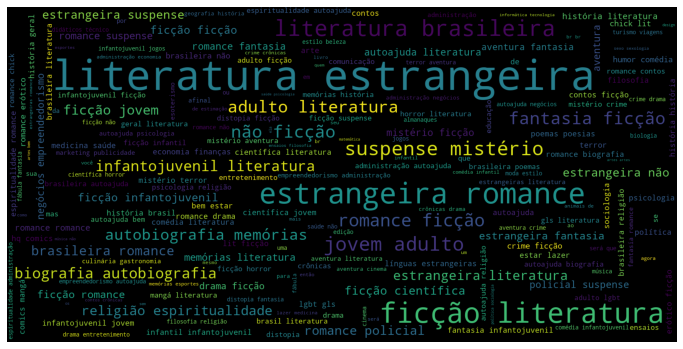

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "de", "do", "em", "a", "ao", "os", "na", "por", "que", "um", "sem", "se", "nas", "então"])

# gerar uma wordcloud dos autores
#wordcloudGeneros = WordCloud(stopwords = stopwords, normalize_plurals= True,background_color="black", width=1600, height=800).generate(genero)
wordcloudGeneros = WordCloud(background_color="black", width=1600, height=800).generate(genero)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(12,8))
ax.set_axis_off() #não mostra os valores dos eixos x e Y
plt.imshow(wordcloudGeneros); #mostra imagem
#wordcloud.to_file('./generos.png') #se quiser salvar

**Mais dicas:** https://carolinescholles.com/br/nuvem-de-palavras-em-python/
